## Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

## Lets Install the Libraries

In [36]:
# install these libraries given below to run the program successfully, 
# if already installed ignore.
#pip install numpy
#pip install pandas
#pip seaborn
#pip matplotlib

# pip worldcloud

In [2]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactive cells
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Reading the data

In [3]:
# lets import the data
data = pd.read_csv("startup_funding.csv")

# changing the names of the columns inside the data
data.columns = ["S_No", "Date", "Startup_Name", 
                "Industry_Vertical", "SubVertical","City", 
                "Investor", "InvestmentType", "Amount_In_USD", 
                "Remarks"]

# Funtion to clean the string that are there due to utf-8 encoding
def clean_string(x):   # Invisible Control Character 
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["Startup_Name", "Industry_Vertical", "SubVertical","City", "Investor", "InvestmentType", "Amount_In_USD","Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
data.head()


,S_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investor,InvestmentType,Amount_In_USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [4]:
# lets check the column names of the data
data.columns

Index(['S_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'City', 'Investor', 'InvestmentType', 'Amount_In_USD', 'Remarks'],
      dtype='object')

In [5]:
# lets check the shape of the data
print("Size of data", data.shape)

Size of data (3044, 10)


## Data Cleaning

In [6]:
# missing data 

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)


# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data


# No Null Values

,Total,Percent %
S_No,0,0.0
Date,0,0.0
Startup_Name,0,0.0
Industry_Vertical,0,0.0
SubVertical,0,0.0
City,0,0.0
Investor,0,0.0
InvestmentType,0,0.0
Amount_In_USD,0,0.0
Remarks,0,0.0


In [7]:
# lets check the values in the Remarks column
data['Remarks'].value_counts()

nan                                  2625
Series A                              177
Series B                               64
Pre-Series A                           37
Series C                               28
                                     ... 
pre Series-A                            1
QPrize Contest Winners                  1
pre series A                            1
pre-series A                            1
Strategic Funding, Minority stake       1
Name: Remarks, Length: 70, dtype: int64

In [8]:
# Removing the Remarks cloumn, as it contains a lot of nans, and high cardinal column

data = data.drop(['Remarks'], axis = 1)

# lets check the column names after removing the Remarks Column, as it having 
data.columns

Index(['S_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'City', 'Investor', 'InvestmentType', 'Amount_In_USD'],
      dtype='object')

In [9]:
data['Amount_In_USD'].value_counts()

nan          960
10,00,000    165
5,00,000     108
20,00,000     69
30,00,000     66
            ... 
82,50,000      1
8,72,000       1
5,70,000       1
5,37,000       1
32,50,000      1
Name: Amount_In_USD, Length: 472, dtype: int64

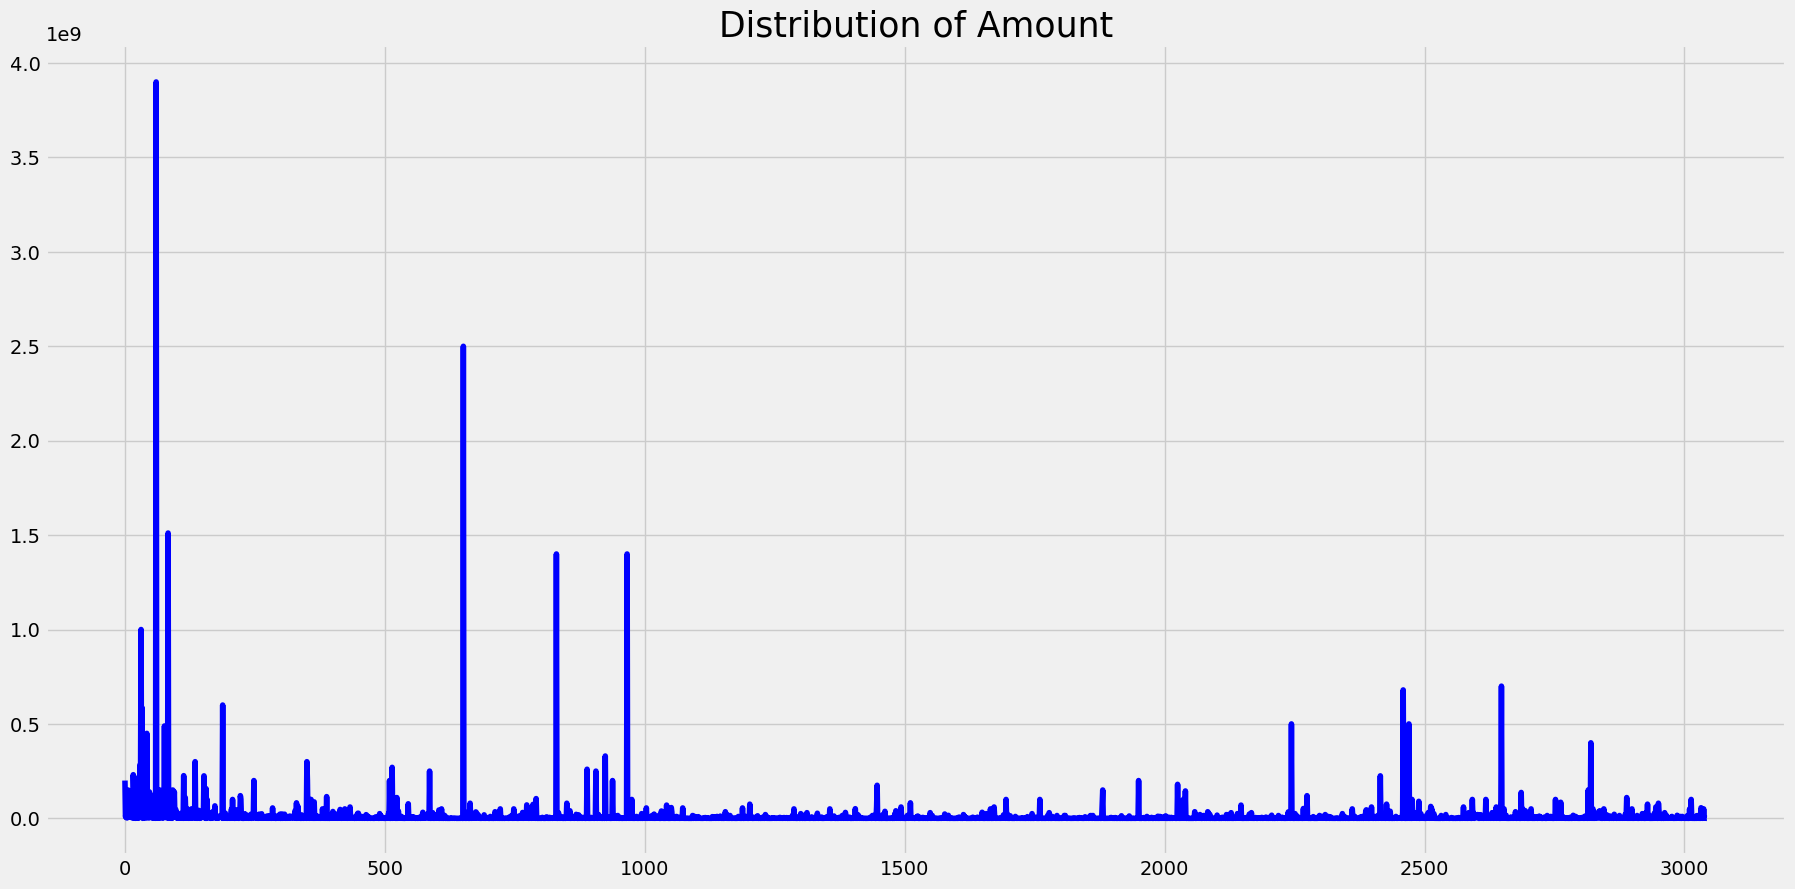

In [10]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])     # to remove all non numeric characters
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-8888'
    return x

# lets apply the function on the column
data["Amount_In_USD"] = data["Amount_In_USD"].apply(lambda x: int(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (20, 10)
data["Amount_In_USD"].plot(kind = 'line', color = 'blue')
plt.title('Distribution of Amount', fontsize = 25)
plt.show()

In [11]:
data['Amount_In_USD'].value_counts()

-8888         971
 1000000      166
 500000       108
 2000000       69
 5000000       67
             ... 
 270000000      1
 329230         1
 692000         1
 8250000        1
 3250000        1
Name: Amount_In_USD, Length: 458, dtype: int64

In [12]:
data['Date']

0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3042    30/01/2015
3043    31/01/2015
Name: Date, Length: 3044, dtype: object

In [13]:
## Cleaning the dates (As there are less wrong dates we are doing it manually )

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


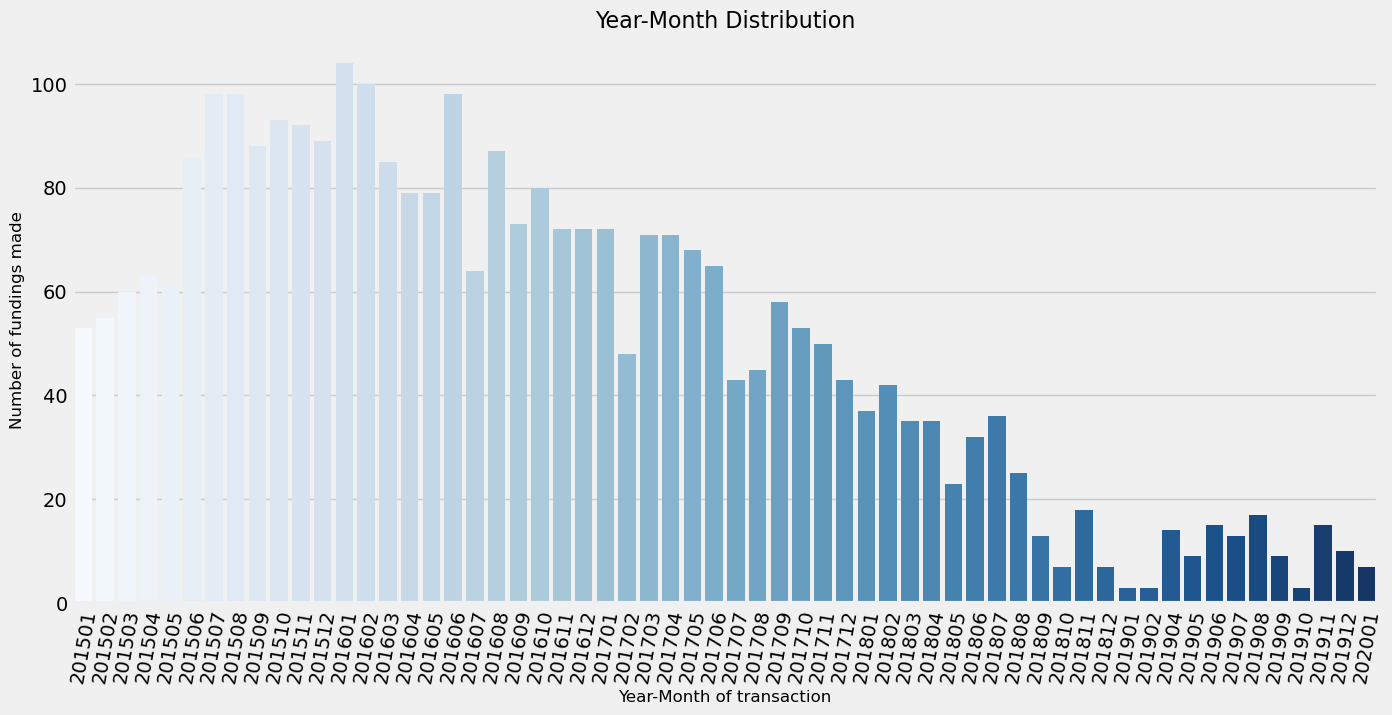

In [14]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'Blues')
plt.xticks(rotation = 80)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [15]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", data["Amount_In_USD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000


In [16]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'Amount_In_USD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'Amount_In_USD', ascending = False)

interactive(children=(Text(value='Amount_In_USD', description='column'), IntSlider(value=500000000, descriptio…

In [17]:
# lets check out different ventures of Paytm
data[data.Startup_Name == 'Paytm']

,S_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investor,InvestmentType,Amount_In_USD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1000000000,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8950000,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1400000000,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,60000000,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,680000000,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-8888,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-8888,201502


In [18]:
# lets check out different ventures of Flipkart
data[data.Startup_Name == 'Flipkart']

,S_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investor,InvestmentType,Amount_In_USD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2500000000,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,71000000,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1400000000,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,38700000,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,50000000,201506


In [19]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["Amount_In_USD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -8888


In [20]:
# lets check the startups with least funding
data[['Amount_In_USD','Startup_Name']].sort_values(by = 'Amount_In_USD', ascending = True).head(5)

,Amount_In_USD,Startup_Name
2125,-8888,Splitkart
1464,-8888,TAC Security
708,-8888,FableStreet
709,-8888,Monsoon Fintech
710,-8888,MonkeyBox


In [21]:
# No. of startups with no funding
data[data['Amount_In_USD'] == 9990000000].shape

(0, 10)

In [22]:
# Average Funding
print("On Average indian startups got funding of : ", data["Amount_In_USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  13267541.76346912


Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: Startup_Name, dtype: int64


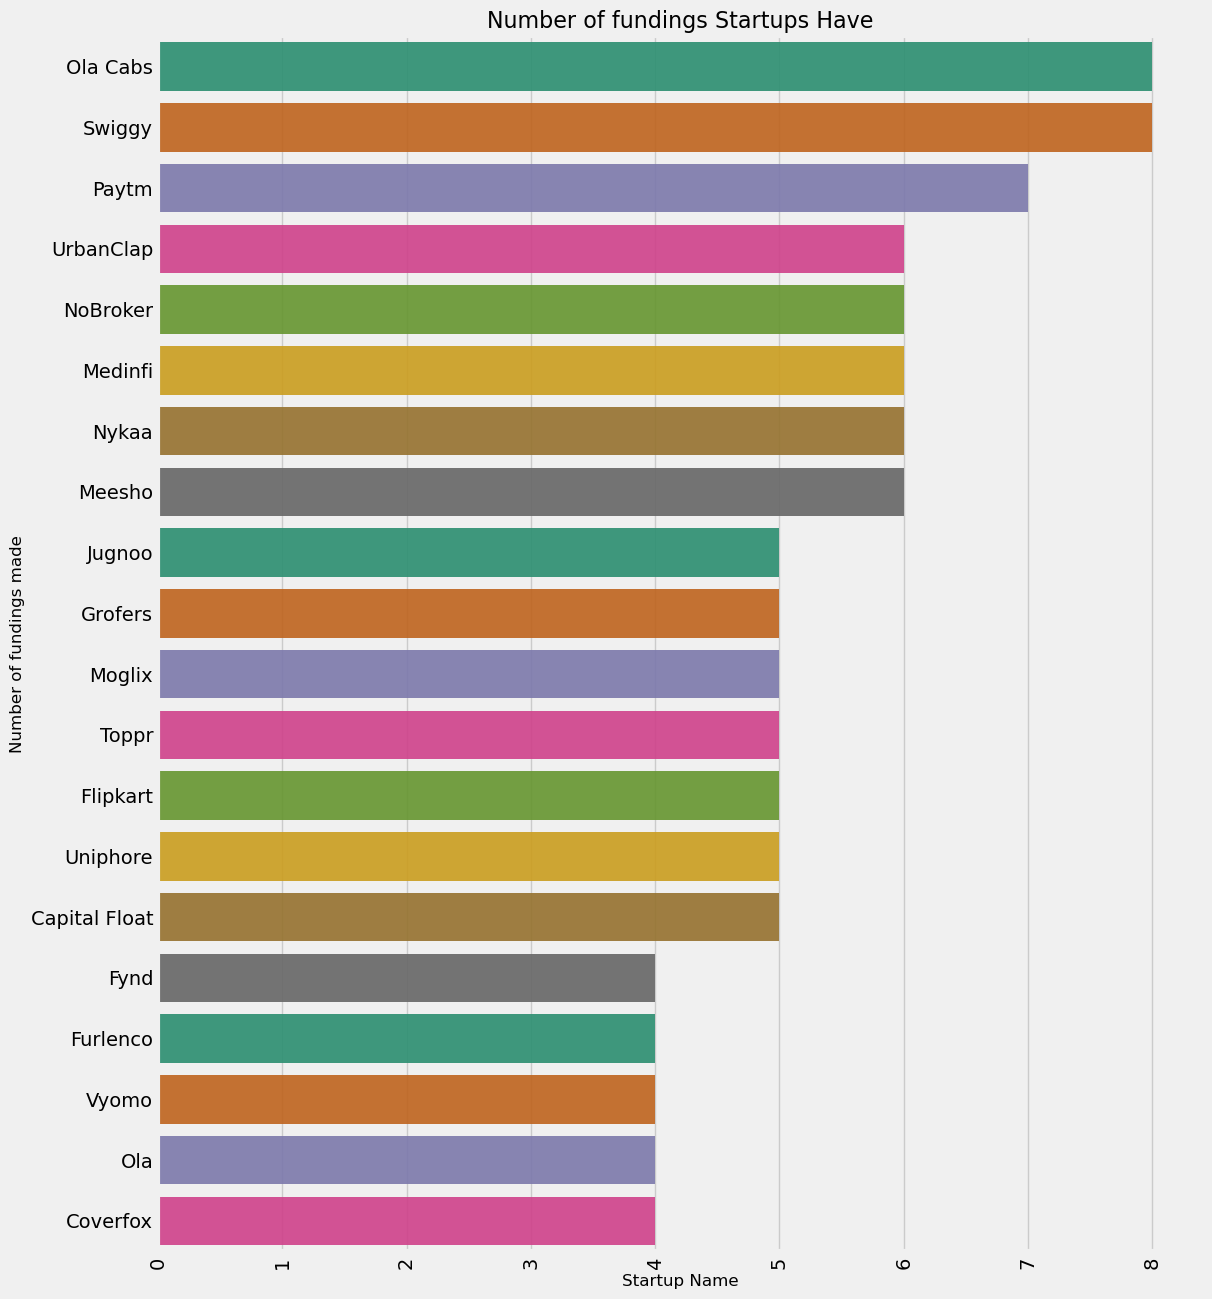

In [23]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["Startup_Name"].unique()))
print(data["Startup_Name"].value_counts().head(10))
startupname = data['Startup_Name'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: Industry_Vertical, dtype: int64


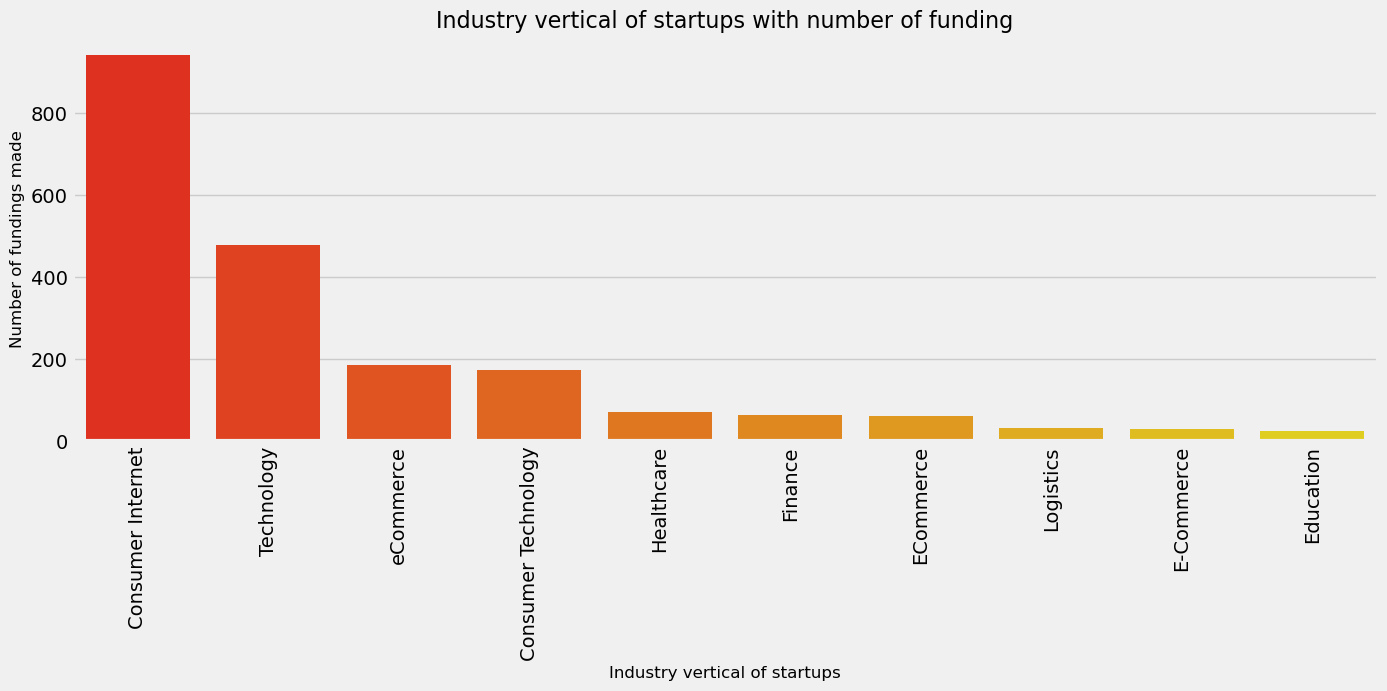

In [24]:
# lets analyze the Industry of the Startups

# data cleaning
data['Industry_Vertical'] = data['Industry_Vertical'].replace('nan', 'Consumer Technology')

industry = data['Industry_Vertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online Education Platform                         5
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online Gifting platform                           3
B2B Marketplace                                   3
Online learning platform                          3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Furniture Store                            3
Online Insurance Aggregator                       3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS        

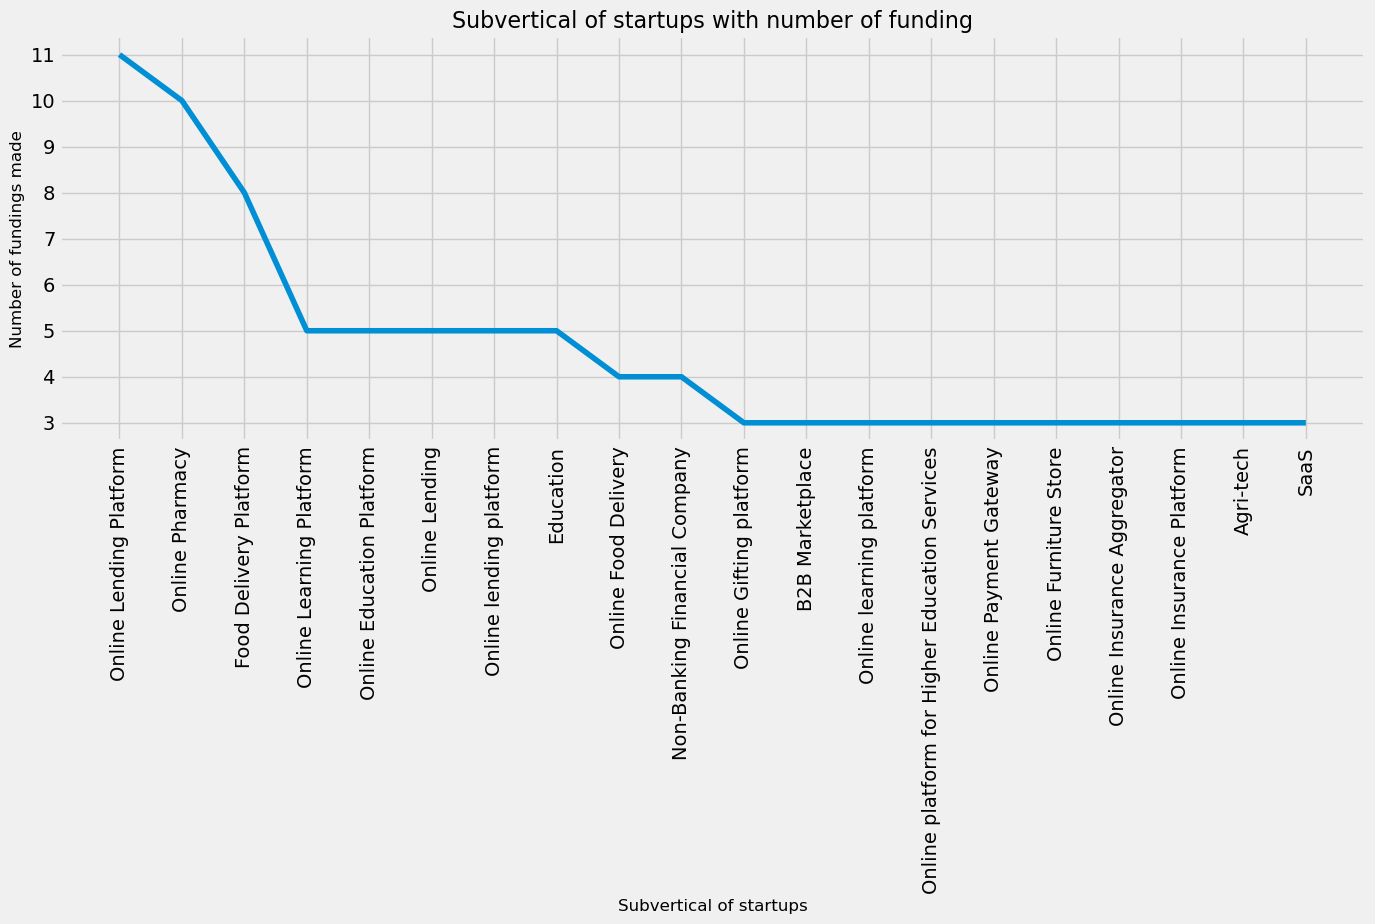

In [25]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


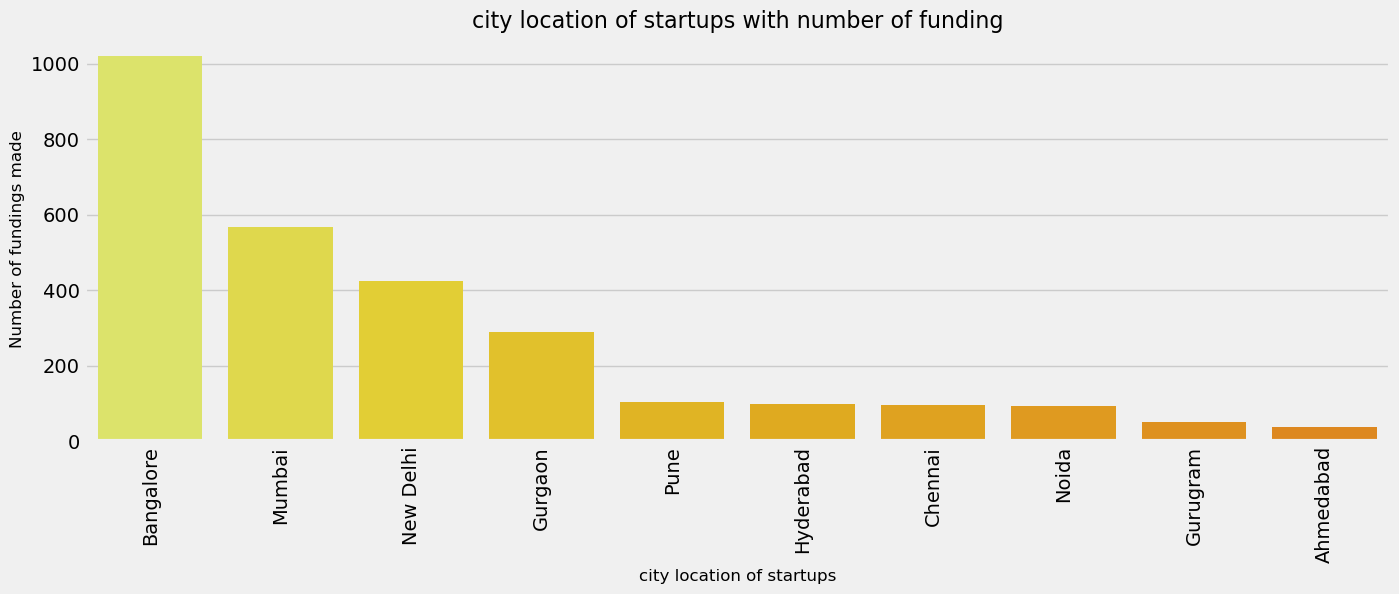

In [26]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

## Who plays the main role in Indian Startups Ecosystem?

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


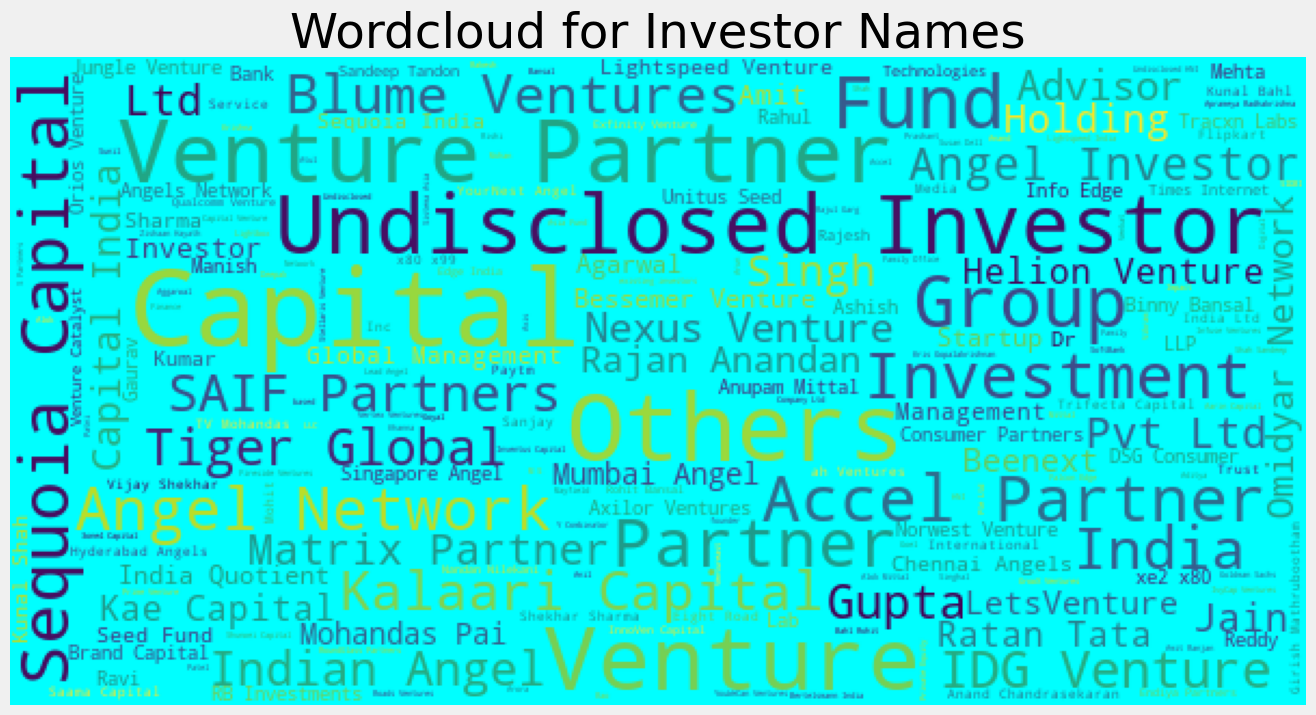

In [34]:
from wordcloud import WordCloud

names = data["Investor"][~pd.isnull(data["Investor"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: Investor, dtype: int64


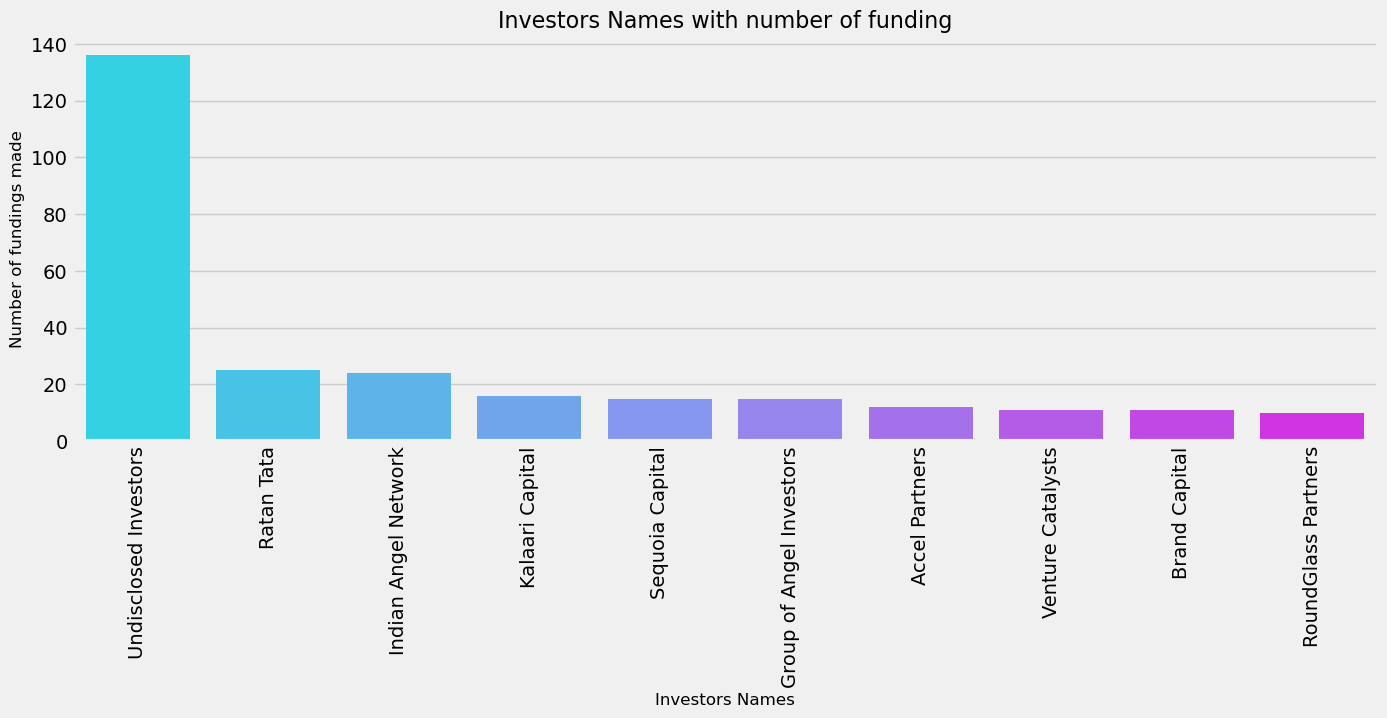

In [32]:
# lets analyze the investors on startups

# lets clean the dataset
data['Investor'][data['Investor'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'Undisclosed'] = 'Undisclosed Investors'
data['Investor'][data['Investor'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['Investor'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


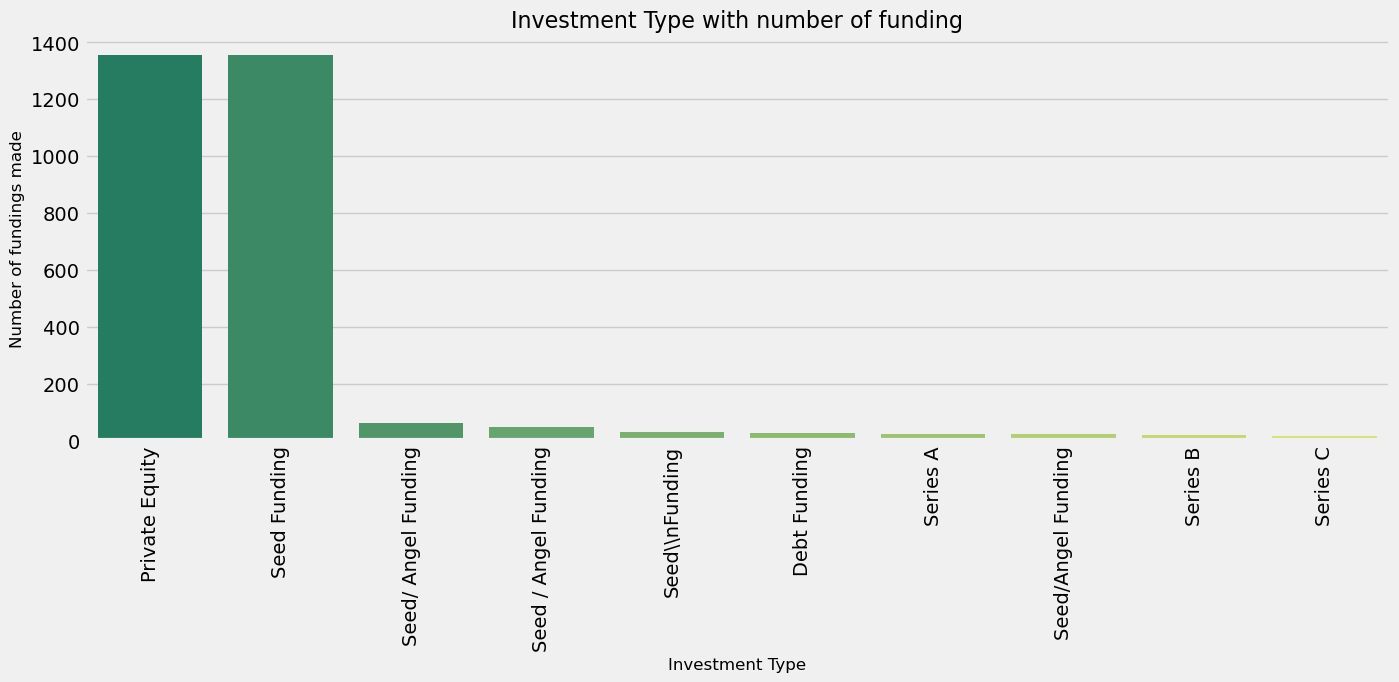

In [35]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()